In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Import Data

In [5]:
df=pd.read_csv("./Datasets/archive/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# check giá trị null
df.isnull().sum().sum()

0

In [7]:
# kiểm tra số lượng hình ảnh trùng lặp
df.duplicated().sum()

43

In [8]:
# bỏ 43 bức ảnh trùng lặp
df.drop_duplicates(inplace=True)
df.shape

(59957, 785)

In [9]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

([<matplotlib.patches.Wedge at 0x14adbe9d0>,
 [Text(1.0461211913794548, 0.3400447807963392, '0'),
  Text(0.6463352588911015, 0.89008467749657, '1'),
  Text(0.00014408221604796532, 1.0999999905637796, '2'),
  Text(-0.6461487184761706, 0.8902201040257418, '3'),
  Text(-1.046014245992434, 0.3403736141079097, '4'),
  Text(-1.0462458356430757, -0.33966108313953514, '5'),
  Text(-0.6468947722718439, -0.8896781179771476, '6'),
  Text(-0.0007780850997711167, -1.0999997248106828, '7'),
  Text(0.6461487184761701, -0.8902201040257423, '8'),
  Text(1.0461212072980985, -0.3400447318238715, '9')])

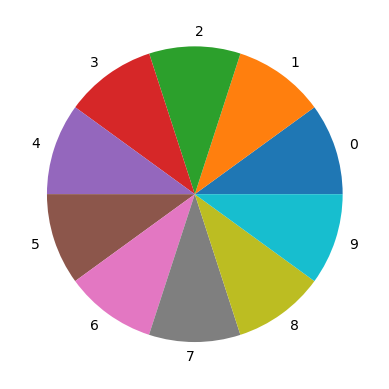

In [32]:
# phân tích các nhãn và số tương ứng của chúng
colors = sns.color_palette('mako_r')[1:3]
plt.pie(x=df.groupby(['label']).count()['pixel1'],labels=df.groupby(['label']).count().index)

Data Preprocessing + Making Pipeline

In [11]:
# Creating X and y variables
X=df.drop('label',axis=1)
y=df.label
xx=X[0:500]
yy=y[0:500]

In [13]:
# Chuẩn hoá MinMax
normalize=MinMaxScaler()

In [14]:
test_error_rate=[]
train_error_rate=[]
for k in range(1,31):
    knn=KNeighborsClassifier(k)
    operations=[('normalize',normalize),('knn',knn)]
    pipe=Pipeline(steps=operations)
    cross_dict=cross_validate(pipe,xx,yy,cv=5,scoring='accuracy', return_train_score=True)
    test_error_rate.append(cross_dict['test_score'].mean())
    train_error_rate.append(cross_dict['train_score'].mean())

In [15]:
train_error_rate=[1-acc for acc in train_error_rate]
test_error_rate=[1-acc for acc in test_error_rate]

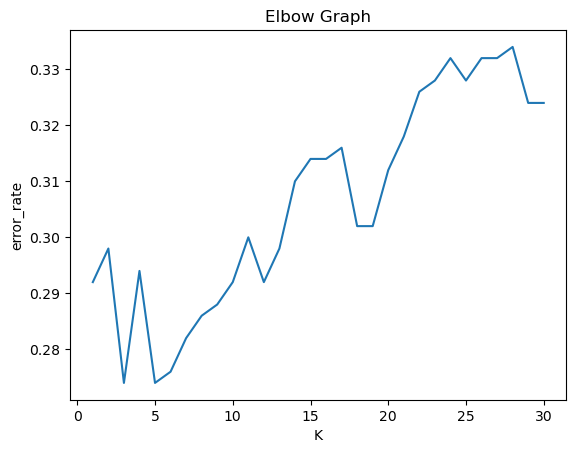

In [16]:
plt.title('Elbow Graph')
plt.xlabel('K')
plt.ylabel('error_rate')
sns.lineplot(x=range(1,31),y=test_error_rate);

=> Chọn k = 5 

In [17]:
# huấn luyện với K=5
knn=KNeighborsClassifier(n_neighbors=5)

In [18]:
# normalizing the predictors
X_norm=normalize.fit_transform(xx)

In [19]:
# khớp dữ liệu đã chuyển đổi trên đối tượng KNN ở trên
knn.fit(X_norm,yy)

KNeighborsClassifier()

In [20]:
# giá trị dự đoán
y_pred=knn.predict(X_norm)
y_pred

array([8, 9, 4, 0, 3, 4, 4, 7, 4, 8, 0, 6, 9, 0, 2, 0, 9, 3, 0, 3, 8, 7,
       6, 4, 0, 4, 4, 6, 7, 1, 5, 0, 7, 0, 3, 9, 3, 2, 2, 1, 6, 0, 9, 0,
       0, 7, 6, 7, 7, 2, 5, 2, 2, 4, 1, 4, 9, 8, 0, 4, 5, 9, 6, 3, 5, 8,
       5, 9, 8, 1, 2, 8, 1, 4, 2, 8, 3, 4, 2, 5, 3, 2, 6, 8, 1, 6, 7, 3,
       6, 4, 6, 5, 0, 1, 7, 3, 7, 9, 2, 3, 8, 5, 0, 5, 3, 0, 8, 7, 6, 1,
       0, 7, 2, 1, 9, 7, 6, 9, 3, 3, 2, 2, 0, 6, 1, 0, 3, 5, 9, 7, 7, 0,
       3, 6, 7, 2, 4, 1, 3, 1, 0, 2, 3, 0, 3, 3, 6, 7, 9, 3, 7, 2, 6, 8,
       8, 0, 7, 5, 6, 1, 9, 5, 3, 7, 0, 8, 9, 7, 7, 7, 0, 9, 2, 0, 0, 4,
       1, 9, 4, 7, 2, 3, 0, 0, 8, 3, 5, 2, 3, 2, 6, 1, 7, 7, 5, 7, 7, 8,
       0, 4, 3, 9, 7, 4, 5, 3, 2, 7, 6, 9, 6, 9, 2, 1, 2, 7, 3, 8, 3, 1,
       3, 0, 0, 0, 3, 2, 8, 9, 2, 8, 8, 2, 6, 6, 8, 7, 0, 1, 3, 9, 5, 1,
       9, 0, 7, 7, 7, 2, 3, 8, 2, 2, 5, 9, 3, 4, 9, 3, 1, 3, 0, 9, 1, 4,
       9, 9, 4, 2, 3, 6, 1, 4, 9, 3, 7, 4, 6, 7, 0, 1, 1, 7, 2, 2, 1, 0,
       3, 1, 5, 5, 8, 4, 7, 2, 3, 8, 4, 5, 5, 6, 3,

Text(50.722222222222214, 0.5, 'Actuals')

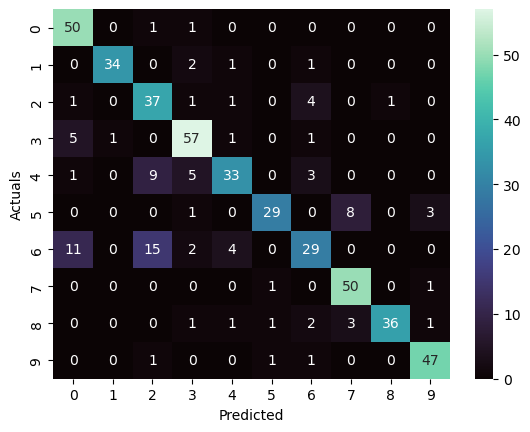

In [22]:
# tạo confusion matrix cho tập huấn luyện này
sns.heatmap(confusion_matrix(yy,y_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals')

In [23]:
print(classification_report(yy,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83        52
           1       0.97      0.89      0.93        38
           2       0.59      0.82      0.69        45
           3       0.81      0.88      0.84        65
           4       0.80      0.65      0.72        51
           5       0.91      0.71      0.79        41
           6       0.71      0.48      0.57        61
           7       0.82      0.96      0.88        52
           8       0.97      0.80      0.88        45
           9       0.90      0.94      0.92        50

    accuracy                           0.80       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.81      0.80      0.80       500



In [24]:
# Tính độ chính xác accuracy_score
train_accuracy=round(100*accuracy_score(yy,y_pred),2)
print(f'Độ chính xác của tập train là: {train_accuracy}%')

Độ chính xác của tập train là: 80.4%


              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1000
           1       0.97      0.93      0.95      1000
           2       0.54      0.66      0.59      1000
           3       0.78      0.84      0.81      1000
           4       0.62      0.59      0.61      1000
           5       0.93      0.50      0.65      1000
           6       0.45      0.31      0.36      1000
           7       0.67      0.86      0.75      1000
           8       0.97      0.76      0.85      1000
           9       0.80      0.94      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.71     10000
weighted avg       0.73      0.72      0.71     10000

The test accuracy score is 72.04%


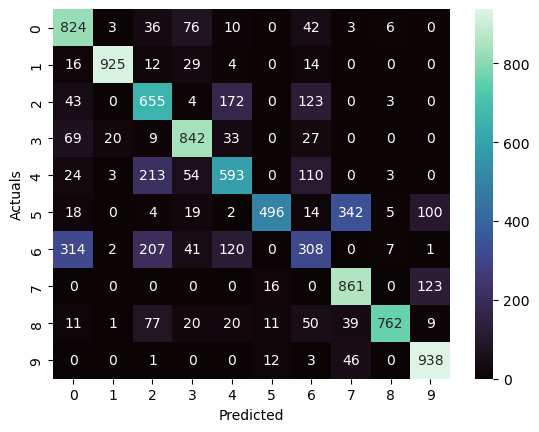

In [25]:
# Làm tương tự với bộ test
df_test=pd.read_csv("./Datasets/archive/fashion-mnist_test.csv")
X_test=df_test.drop('label',axis=1)
y_test=df_test.label
X_test_norm=normalize.transform(X_test)
y_test_pred=knn.predict(X_test_norm)
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, cmap='mako', fmt='.5g')
plt.xlabel('Predicted')
plt.ylabel('Actuals');
print(classification_report(y_test,y_test_pred))
test_accuracy=round(100*accuracy_score(y_test,y_test_pred),2)
print(f'The test accuracy score is {test_accuracy}%')

In [31]:
import faiss
x_train = xx.values
dimension = x_train.shape[1]

index = faiss.IndexFlatL2(dimension)
index.add(x_train)

query_data_faiss = np.random.rand(1, dimension).astype('float32')
k = 5
dist_faiss, indices_faiss = index.search(query_data_faiss, k)

print("Chỉ số và khoảng cách của knn tìm thấy bằng Faiss.")
print("Chỉ số:", indices_faiss)
print("Khoảng cách:", dist_faiss)


Chỉ số và khoảng cách của knn tìm thấy bằng Faiss.
Chỉ số: [[352 196 336 276 278]]
Khoảng cách: [[ 360929.03  546037.   1060735.6  1149172.6  1154008.5 ]]
